# Determinam nivelul sanatatii elevilor dupa indicii de consum de alcool, relatii cu membrii familiei, timpul liber etc.

In [1]:
import pandas as pd # Dataframe-ul și series-ul nostru
from sklearn.tree import DecisionTreeClassifier # Importăm Clasificatorul „Arborele decizional”
from sklearn.model_selection import train_test_split # Importăm funcția de separare a datelor în date de antrenare și date de testare
from sklearn import metrics #Importăm modulel metrici pentru caluclarea acurateții

In [1]:
# setul de date
data = pd.read_csv("student-mat.csv")
data

NameError: name 'pd' is not defined

In [39]:
features = ['famrel', 'freetime', 'goout', 'Dalc', 'Walc']
X = data[features]
y = data['health']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
X_test

,famrel,freetime,goout,Dalc,Walc,age,Medu,Fedu,absences,G1,G2,G3
146,3,3,2,1,1,15,3,2,0,6,7,0
379,4,5,4,2,3,17,3,1,17,10,10,10
247,5,4,5,5,5,22,3,1,16,6,8,8
197,3,3,4,3,5,16,3,3,8,9,9,10
368,5,2,3,1,2,18,2,3,0,11,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...
376,5,4,3,1,1,20,4,2,4,15,14,15
84,4,3,2,2,3,15,1,1,2,9,10,10
8,4,2,2,1,1,15,3,2,0,16,18,19
229,3,2,3,1,2,17,2,1,10,12,10,12


In [41]:
classifier = DecisionTreeClassifier(criterion="entropy")
trained_classifier = classifier.fit(X_train, y_train)

In [42]:
predicted_y = trained_classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, predicted_y))
print(y_test, predicted_y)

Accuracy: 0.25757575757575757
146    3
379    1
247    1
197    3
368    4
      ..
376    3
84     4
8      1
229    3
99     3
Name: health, Length: 198, dtype: int64 [5 5 5 3 3 5 5 1 5 2 5 5 1 1 1 5 2 1 4 4 5 2 5 5 3 1 5 5 5 3 1 5 1 3 2 4 2
 5 4 5 5 1 5 1 5 3 2 1 5 4 1 5 3 5 5 2 5 5 1 5 2 5 1 1 2 5 5 5 4 1 1 3 1 4
 5 4 5 3 1 5 2 2 5 5 5 5 3 5 5 1 5 3 4 4 3 5 4 2 1 3 5 4 4 1 5 5 1 3 3 2 3
 5 4 5 5 1 3 3 1 4 5 2 3 2 5 4 3 4 3 2 5 4 3 4 5 5 2 5 5 5 5 1 5 4 1 3 1 2
 3 5 3 3 1 1 5 5 5 2 3 1 3 2 4 2 3 1 3 3 5 2 3 1 3 1 5 4 2 3 2 5 5 3 3 1 3
 3 4 3 5 1 2 5 1 2 3 3 3 3]


In [43]:
cnames = [ str(i) for i in data['health'].tolist() ]

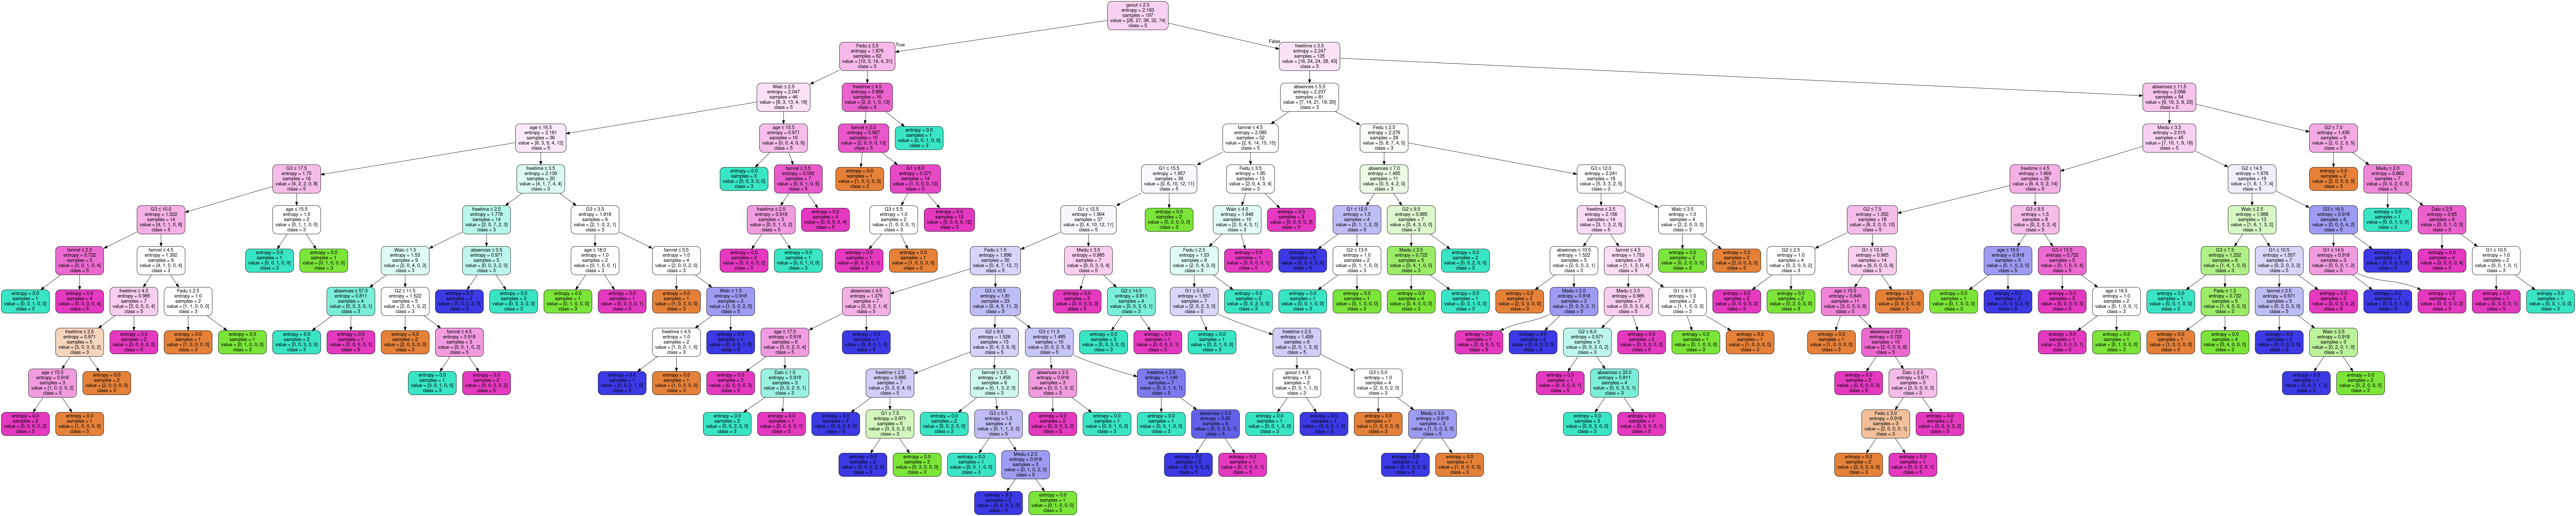

In [44]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(trained_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=cnames)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('student.png')
Image(graph.create_png())

# Concluzie
Lucrarea data de laborator a avut ca scop determinarea nivelului sanatatii elevilor in baza datelor despre consumul de alcool, timpul liber, relatiile cu membrii familiei etc. Pentru acest lucru am utilizat arborele de decizii. Jumatate din datele de intrare au fost folosite ca date de antrenare si jumatate ca date de testare. In final am obtinut un model de clasificare, care ne permite prezicerea nivelului sanatatii elevului in baza indicilor indicati. Arborele obtinut este foarte ramificat si rata prezicerii (clasificarii) este joasa, deoarece corelatia dintre date este mica, chiar daca din punct de vedere logic datele ar trebui sa fie interdependete. Pentru obtinerea unui rezultat mai bun, trebuie de selectat un alt set de date.
